### MODELING AND PREDICTING TRAFFIC CONGESTION LEVELS AND PEDESTRIAN CROSSING AT DIFFERENT TIMES OF THE DAY 
## BY: Group 5
1. Kevin Muchori
2. Benson Kamau
3. Sally Kinyanjui
4. Breden Mugambi
5. Nancy Chelangat

## Overview:  
The urban mobility and transportation sector are vital for the functioning of modern cities, enabling the movement of people and goods efficiently. Within this industry, traffic management and pedestrian safety are crucial components that directly impact the quality of life in urban areas. Effective traffic pattern analysis and prediction can help mitigate congestion, enhance safety, and improve overall urban mobility.
Well managed traffic leads to minimized economic losses, improved quality of life especially on the side of pedestrians.

## Challenges:
There are so many problems that are encountered especially in most urban towns whose vehicle and pedestrian population continues to grow every day. One of the problems is the traffic congestion which leads to higher traffic volumes which in turn brings about economic losses due to wasted time and fuel, increased pollution. Another key challenge is the pedestrian safety where High pedestrian traffic in urban areas increases the risk of accidents.  A challenge to also note is collecting accurate and real-time data from various sources is challenging which would make accurate traffic and pedestrian predictions challenging.

## Proposed solutions:
To solve some of these challenges would include measures such as advocating for sustainable urban mobility policies and invest in supportive infrastructure.  Use of Use machine learning models to analyze and predict traffic patterns and pedestrian crossings at different times of the day. In order to gather real-time data on traffic and pedestrian movement would require use of high technology like IoT devices.

## Conclusion:
The analysis and prediction of traffic congestion levels and pedestrian crossings are essential for enhancing urban mobility and safety. Successful implementation of these solutions can lead to reduced congestion, fewer accidents, and an overall improvement in the quality of urban life.


## Problem Statement:

Urban areas continue to face significant challenges in managing their traffic congestion and ensuring pedestrian safety. The changing nature of these areas together with the increasing volume of both vehicle and pedestrian traffic, makes it hard for one to predict traffic patterns affectively.

## Objective :
Our primary objective is to create an accurate time series model(s) and machine learning model(s) that can model, analyze and predict traffic congestion levels and pedestrian crossings at different times of the day.

### Specific objectives:
1.  To identify key factors that influence traffic and pedestrian movement
2.  To develop predictive models for forecasting future traffic congestion and pedestrian crossing patterns.
3.  To provide recommendations for urban planners and traffic management authorities to improve traffic flow and pedestrian safety.


## Data Understanding
The data to use in this study is sourced from the UC Irvine Machine Learning Repository.  It has 4760 rows and 22 data features.

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [205]:
#create a function that loads data and gets the info about the data.
def load_and_get_info(file_path, encoding='utf-8'):
    try :
        # Load data
        df = pd.read_csv(file_path, encoding=encoding)

        # Display the first few rows of the DataFrame
        df_head = df.head()

        # Get information about the DataFrame
        df_info = df.info()

        return df,df_info, df_head
    except UnicodeDecodeError:
        print(f"Failed to decode {file_path} with encoding {encoding}. Trying with 'latin1' encoding.")
        return load_and_get_info(file_path, encoding='latin1')

# A function that checks the data types of DataFrame columns and return the count of columns for each data type category.
def check_data_types(df):

    data_type_counts = df.dtypes.replace({'object': 'string'}).value_counts().to_dict()
    return data_type_counts

In [206]:
file_path = "/Users/jarma/Desktop/traffic_data.csv"
#file_path = '/Users/mac/Documents/GitHub/Traffic-analysis-project/traffic_data1 (1).csv'
df1,data_info, data_head = load_and_get_info(file_path)
print(data_info)
print("\nFirst few rows of the DataFrame:")
data_head #data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   oid                4759 non-null   object 
 1   timestamp          4759 non-null   object 
 2   date               4759 non-null   object 
 3   hour               4759 non-null   int64  
 4   x                  4759 non-null   float64
 5   y                  4759 non-null   float64
 6   vehicle_count      4759 non-null   int64  
 7   pedestrian_count   4759 non-null   int64  
 8   congestion_level   4759 non-null   object 
 9   weather_condition  4759 non-null   object 
 10  temperature        4759 non-null   float64
 11  location           4759 non-null   object 
 12  other_oid          4759 non-null   object 
 13  other_class        4759 non-null   object 
 14  other_x            4759 non-null   object 
 15  other_y            4759 non-null   object 
 16  body_roll          0 non

oid            timestamp        date  hour          x          y  \
0  oid_0  2023-01-01 00:00:00  2023-01-01     0  76.330009  37.469175   
1  oid_1  2023-01-01 01:00:00  2023-01-01     1   6.867522  42.072927   
2  oid_2  2023-01-01 02:00:00  2023-01-01     2   3.076632  84.575050   
3  oid_3  2023-01-01 03:00:00  2023-01-01     3  35.477393  56.481094   
4  oid_4  2023-01-01 04:00:00  2023-01-01     4  76.949776  94.133781   

   vehicle_count  pedestrian_count congestion_level weather_condition  ...  \
0             17                 7              low             snowy  ...   
1              3                14              low             sunny  ...   
2             12                49             high            cloudy  ...   
3              4                23           medium             sunny  ...   
4              6                19              low             rainy  ...   

                                           other_oid  \
0  ['oid_284', 'oid_111', 'oid_354', 'oid_403', '...   
1                                        ['oid_934']   
2                                        ['oid_787']   
3          ['oid_3', 'oid_295', 'oid_293', 'oid_17']   
4                                        ['oid_979']   

                                         other_class  \
0  ['vehicle', 'pedestrian', 'cyclist', 'cyclist'...   
1                                        ['vehicle']   
2                                        ['vehicle']   
3  ['vehicle', 'vehicle', 'pedestrian', 'pedestri...   
4                                        ['cyclist']   

                                             other_x  \
0  [80.16643167796968, 23.193568120739716, 99.294...   
1                               [18.255748305303598]   
2                                [77.73281545583741]   
3  [42.84992200954636, 0.5787418544833112, 33.701...   
4                                [58.92263259975318]   

                                             other_y body_roll body_pitch  \
0  [10.968289671858821, 54.31625209147144, 12.196...       NaN        NaN   
1                                [83.65003937685206]       NaN        NaN   
2                                [59.64309260346252]       NaN        NaN   
3  [20.071410763398468, 78.18601194561984, 99.104...       NaN        NaN   
4                               [12.460936540645529]       NaN        NaN   

   body_yaw  head_roll  head_pitch  head_yaw  
0       NaN        NaN         NaN       NaN  
1       NaN        NaN         NaN       NaN  
2       NaN        NaN         NaN       NaN  
3       NaN        NaN         NaN       NaN  
4       NaN        NaN         NaN       NaN  

[5 rows x 22 columns]

The dataset contains the following columns:

oid: This column represents a unique identifier for each object record in the dataset.

timestamp: This column stores the exact time of each record

date: This column extracts the date portion from the timestamp column, providing the day without the time information.

hour: This column extracts the hour of the day (0-23) from the 'timestamp' column.

x: This column represents the X-coordinate of each object in our data.

y: This column represents the Y-coordinate of each object in our data.

vehicle_count: This column indicates the number of vehicles observed in the vicinity of each object record.

pedestrian_count: This column reflects the number of pedestrians observed in the vicinity of each object record.

congestion_level: This column categorizes the traffic congestion level at the time of each record.

weather_condition: This column represents the weather condition at the time of each record

temperature: This column holds the temperature recorded at the time of each data point.


## Data Cleaning

### Step 1: Dropping  the empty columns

The columns body_roll, body_pitch, body_yaw, head_roll, head_pitch, and head_yaw have no data therefore will not be useful for our project. We will therefore proceed to drop them.

In [207]:
columns_to_drop = ['body_roll', 'body_pitch', 'body_yaw', 'head_roll', 'head_pitch', 'head_yaw']
cleaned_df = df1.drop(columns=columns_to_drop)

Step 2: Convert the 'timestamp' column to datetime format

In [208]:
cleaned_df['date'] = pd.to_datetime(cleaned_df['date'])
cleaned_df['timestamp'] = pd.to_datetime(cleaned_df['timestamp'])

### Step 3: Check for and remove duplicate rows



In [209]:
cleaned_df = cleaned_df.drop_duplicates()
cleaned_df.head()

oid           timestamp       date  hour          x          y  \
0  oid_0 2023-01-01 00:00:00 2023-01-01     0  76.330009  37.469175   
1  oid_1 2023-01-01 01:00:00 2023-01-01     1   6.867522  42.072927   
2  oid_2 2023-01-01 02:00:00 2023-01-01     2   3.076632  84.575050   
3  oid_3 2023-01-01 03:00:00 2023-01-01     3  35.477393  56.481094   
4  oid_4 2023-01-01 04:00:00 2023-01-01     4  76.949776  94.133781   

   vehicle_count  pedestrian_count congestion_level weather_condition  \
0             17                 7              low             snowy   
1              3                14              low             sunny   
2             12                49             high            cloudy   
3              4                23           medium             sunny   
4              6                19              low             rainy   

   temperature    location                                          other_oid  \
0    -7.048842  Location_0  ['oid_284', 'oid_111', 'oid_354', 'oid_403', '...   
1    25.756664  Location_1                                        ['oid_934']   
2    33.568159  Location_2                                        ['oid_787']   
3    34.154008  Location_3          ['oid_3', 'oid_295', 'oid_293', 'oid_17']   
4    -1.296653  Location_4                                        ['oid_979']   

                                         other_class  \
0  ['vehicle', 'pedestrian', 'cyclist', 'cyclist'...   
1                                        ['vehicle']   
2                                        ['vehicle']   
3  ['vehicle', 'vehicle', 'pedestrian', 'pedestri...   
4                                        ['cyclist']   

                                             other_x  \
0  [80.16643167796968, 23.193568120739716, 99.294...   
1                               [18.255748305303598]   
2                                [77.73281545583741]   
3  [42.84992200954636, 0.5787418544833112, 33.701...   
4                                [58.92263259975318]   

                                             other_y  
0  [10.968289671858821, 54.31625209147144, 12.196...  
1                                [83.65003937685206]  
2                                [59.64309260346252]  
3  [20.071410763398468, 78.18601194561984, 99.104...  
4                               [12.460936540645529]

Below we will go ahead and breakdown timestamps:

In [210]:
import pandas as pd


# Extract date components
cleaned_df['year'] = cleaned_df['timestamp'].dt.year
cleaned_df['month'] = cleaned_df['timestamp'].dt.month

# Create time-based features
cleaned_df['day_of_week'] = cleaned_df['timestamp'].dt.dayofweek
cleaned_df['hour'] = cleaned_df['timestamp'].dt.hour



By breaking down our project into components, we can be able to use our data in more useful ways for example:
- Comapring traffic levels between weekdays and weekends
- Identifying patterns in traffic congestion at different times of the day.

In [211]:
cleaned_df.head(10)

oid           timestamp       date  hour          x          y  \
0  oid_0 2023-01-01 00:00:00 2023-01-01     0  76.330009  37.469175   
1  oid_1 2023-01-01 01:00:00 2023-01-01     1   6.867522  42.072927   
2  oid_2 2023-01-01 02:00:00 2023-01-01     2   3.076632  84.575050   
3  oid_3 2023-01-01 03:00:00 2023-01-01     3  35.477393  56.481094   
4  oid_4 2023-01-01 04:00:00 2023-01-01     4  76.949776  94.133781   
5  oid_5 2023-01-01 05:00:00 2023-01-01     5  71.310578  89.333961   
6  oid_6 2023-01-01 06:00:00 2023-01-01     6  13.754011  48.245646   
7  oid_7 2023-01-01 07:00:00 2023-01-01     7  81.061662  28.188148   
8  oid_8 2023-01-01 08:00:00 2023-01-01     8  87.816034  39.362988   
9  oid_9 2023-01-01 09:00:00 2023-01-01     9  68.806347   2.551334   

   vehicle_count  pedestrian_count congestion_level weather_condition  \
0             17                 7              low             snowy   
1              3                14              low             sunny   
2             12                49             high            cloudy   
3              4                23           medium             sunny   
4              6                19              low             rainy   
5             15                33             high             snowy   
6             11                 9              low             sunny   
7             15                11           medium             snowy   
8              3                12           medium             sunny   
9              2                 9             high             rainy   

   temperature    location                                          other_oid  \
0    -7.048842  Location_0  ['oid_284', 'oid_111', 'oid_354', 'oid_403', '...   
1    25.756664  Location_1                                        ['oid_934']   
2    33.568159  Location_2                                        ['oid_787']   
3    34.154008  Location_3          ['oid_3', 'oid_295', 'oid_293', 'oid_17']   
4    -1.296653  Location_4                                        ['oid_979']   
5    26.245580  Location_5                  ['oid_541', 'oid_367', 'oid_912']   
6    26.389156  Location_6  ['oid_592', 'oid_699', 'oid_783', 'oid_789', '...   
7    -8.703227  Location_7                                        ['oid_354']   
8    23.729499  Location_8                  ['oid_872', 'oid_362', 'oid_486']   
9    29.737843  Location_9       ['oid_191', 'oid_241', 'oid_708', 'oid_272']   

                                         other_class  \
0  ['vehicle', 'pedestrian', 'cyclist', 'cyclist'...   
1                                        ['vehicle']   
2                                        ['vehicle']   
3  ['vehicle', 'vehicle', 'pedestrian', 'pedestri...   
4                                        ['cyclist']   
5               ['cyclist', 'cyclist', 'pedestrian']   
6  ['vehicle', 'vehicle', 'pedestrian', 'pedestri...   
7                                        ['vehicle']   
8                  ['vehicle', 'cyclist', 'cyclist']   
9    ['cyclist', 'pedestrian', 'vehicle', 'cyclist']   

                                             other_x  \
0  [80.16643167796968, 23.193568120739716, 99.294...   
1                               [18.255748305303598]   
2                                [77.73281545583741]   
3  [42.84992200954636, 0.5787418544833112, 33.701...   
4                                [58.92263259975318]   
5  [26.80521388141838, 42.38347771179725, 72.8236...   
6  [22.5413353172063, 89.92316387700629, 87.03666...   
7                                [81.59701492703762]   
8  [24.195898102204104, 25.39676053509188, 28.502...   
9  [36.71817656917603, 73.06433889448265, 23.8781...   

                                             other_y  year  month  day_of_week  
0  [10.968289671858821, 54.31625209147144, 12.196...  2023      1            6  
1                                [83.65003937685206]  2023      1            6  
2                                [59.6430926034625

From the output,we see that we now have columns indicating the year, month and day of the week.

Let us see whether it works:

In [212]:
"""import pandas as pd

# Sample DataFrame
data = {'timestamp': ['2023-01-15', '2023-02-10', '2023-01-25', '2023-03-05'],
        'value': [10, 20, 15, 25]}
df = pd.DataFrame(data)
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['month'] = df['timestamp'].dt.month

# Filter for January data
january_data = df[df['month'] == 1]

print(january_data)
"""

"import pandas as pd\n\n# Sample DataFrame\ndata = {'timestamp': ['2023-01-15', '2023-02-10', '2023-01-25', '2023-03-05'],\n        'value': [10, 20, 15, 25]}\ndf = pd.DataFrame(data)\ndf['timestamp'] = pd.to_datetime(df['timestamp'])\ndf['month'] = df['timestamp'].dt.month\n\n# Filter for January data\njanuary_data = df[df['month'] == 1]\n\nprint(january_data)\n"

From the output we can see that the from the sample dataframe we had provided,the following timestamps are the ones that belong to the month of January.

In [213]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   oid                4759 non-null   object        
 1   timestamp          4759 non-null   datetime64[ns]
 2   date               4759 non-null   datetime64[ns]
 3   hour               4759 non-null   int32         
 4   x                  4759 non-null   float64       
 5   y                  4759 non-null   float64       
 6   vehicle_count      4759 non-null   int64         
 7   pedestrian_count   4759 non-null   int64         
 8   congestion_level   4759 non-null   object        
 9   weather_condition  4759 non-null   object        
 10  temperature        4759 non-null   float64       
 11  location           4759 non-null   object        
 12  other_oid          4759 non-null   object        
 13  other_class        4759 non-null   object        
 14  other_x 

# **EDA**

In [214]:
df = cleaned_df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4759 entries, 0 to 4758
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   oid                4759 non-null   object        
 1   timestamp          4759 non-null   datetime64[ns]
 2   date               4759 non-null   datetime64[ns]
 3   hour               4759 non-null   int32         
 4   x                  4759 non-null   float64       
 5   y                  4759 non-null   float64       
 6   vehicle_count      4759 non-null   int64         
 7   pedestrian_count   4759 non-null   int64         
 8   congestion_level   4759 non-null   object        
 9   weather_condition  4759 non-null   object        
 10  temperature        4759 non-null   float64       
 11  location           4759 non-null   object        
 12  other_oid          4759 non-null   object        
 13  other_class        4759 non-null   object        
 14  other_x 

Checking the values in the different columns

Plotting
create a function that will be used to plot histograms to show frequency in the different applicable columns

In [215]:
def frequency_plotting(df, column_name):
    """
    Plots a bar graph of the frequency distribution for a given column in a DataFrame,
    with values displayed on top of each bar.

    Args:
        df (pandas.DataFrame): The DataFrame containing the data.
        column_name (str): The name of the column to plot the frequency distribution for.
    """

    # Print value counts for reference
    print(df[column_name].value_counts())

    # Get values and counts
    x_values = df[column_name].value_counts().index
    y_values = df[column_name].value_counts().values

    # Create the bar graph
    plt.figure(figsize=(8, 6))  # Set a reasonable figure size
    bars = plt.bar(x_values, y_values, edgecolor='black')



    for bar, value in zip(bars, y_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), value,
                 ha='center', va='bottom')

    # Add labels and title
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column_name}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.tight_layout()
    plt.show()


weather_condition
snowy     1197
sunny     1194
rainy     1194
cloudy    1174
Name: count, dtype: int64


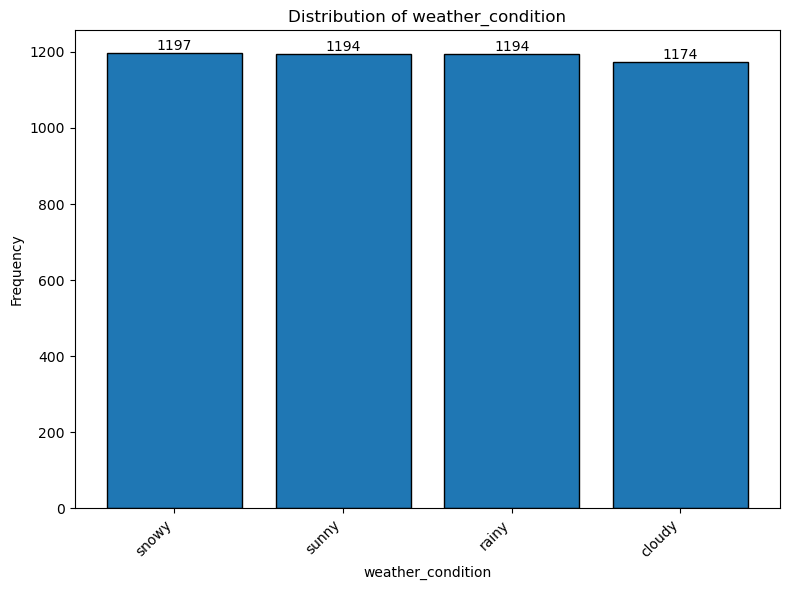

In [216]:
frequency_plotting(df, 'weather_condition')

congestion_level
low       1613
medium    1590
high      1556
Name: count, dtype: int64


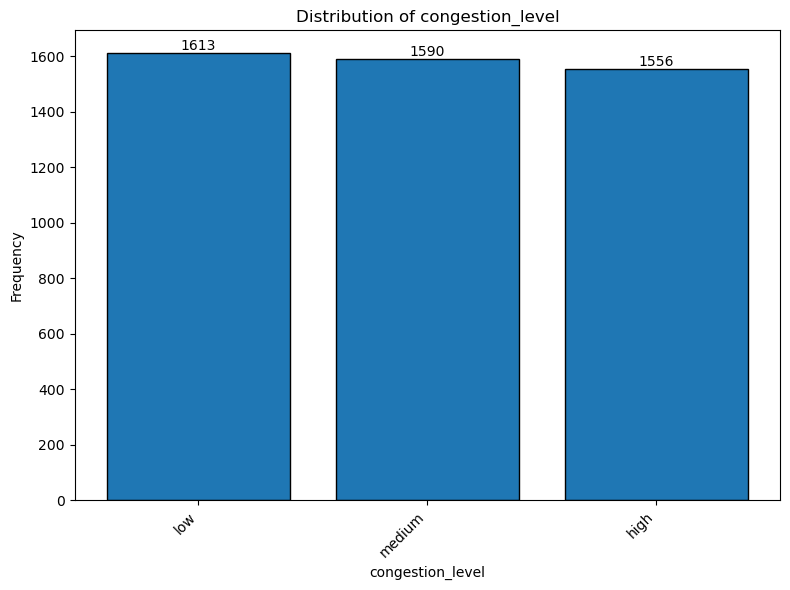

In [217]:
frequency_plotting(df, 'congestion_level')

temperature
-7.048842     1
 14.248410    1
 29.964628    1
 25.171177    1
 20.313640    1
             ..
 12.700280    1
 9.953869     1
 2.139950     1
-6.980358     1
 18.013396    1
Name: count, Length: 4759, dtype: int64


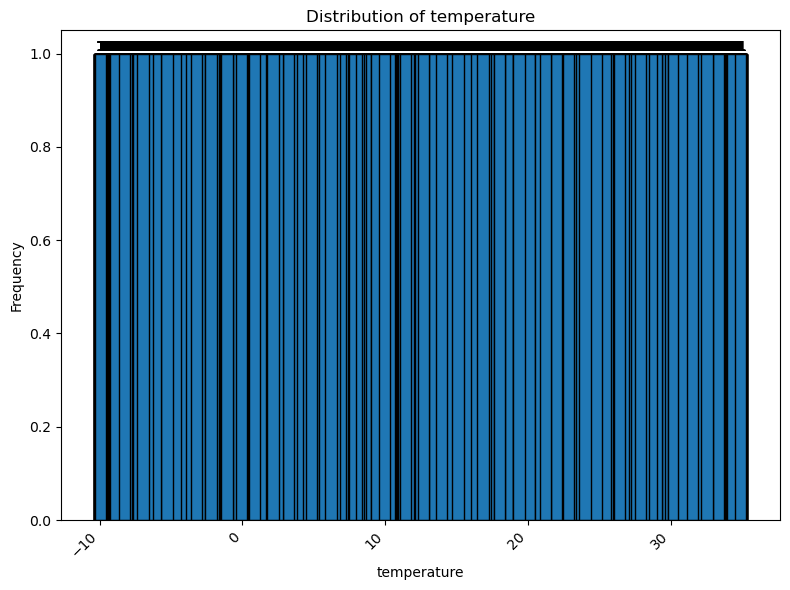

In [218]:
frequency_plotting(df, 'temperature')

temp and time?

vehicle_count
12    282
5     264
15    262
8     261
7     258
16    253
9     248
2     244
11    241
3     239
4     235
13    231
1     228
19    222
6     221
14    220
10    217
0     216
17    215
18    202
Name: count, dtype: int64


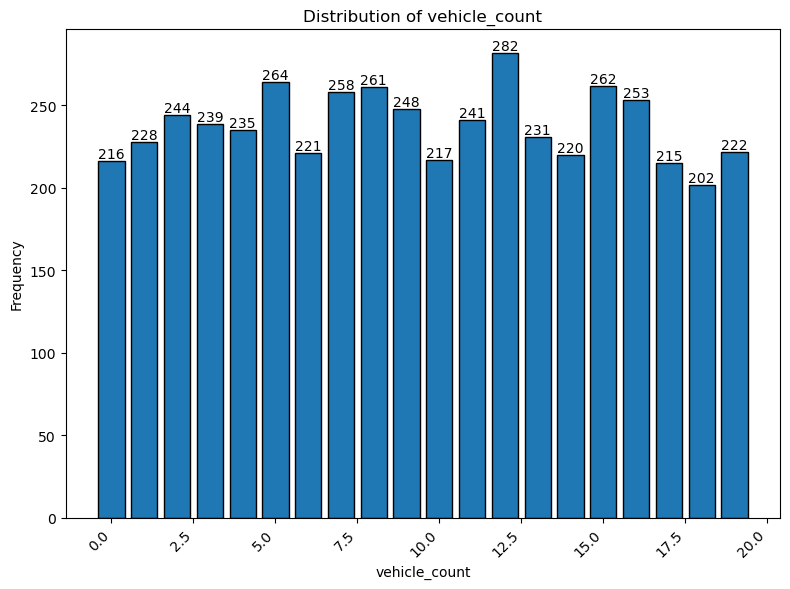

In [219]:
frequency_plotting(df, 'vehicle_count')

pedestrian_count
6     115
5     111
2     110
21    110
41    110
16    108
26    107
30    105
12    104
31    103
24    103
35    103
20    103
19    102
47    100
45    100
33    100
8     100
1      99
11     99
48     99
44     98
3      98
42     98
37     98
9      97
39     96
7      95
38     95
4      94
32     93
49     93
18     92
22     92
23     91
43     91
25     90
17     89
15     88
46     88
28     88
13     87
0      86
29     81
27     80
34     78
40     76
36     75
14     74
10     67
Name: count, dtype: int64


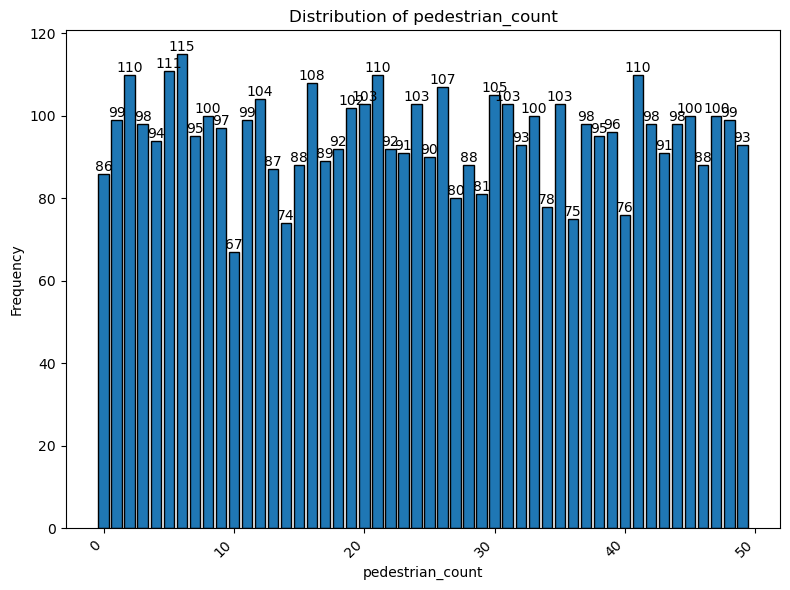

In [220]:
frequency_plotting(df, 'pedestrian_count')

### MODELING

In [221]:
#necessary libraries for modelimg
import pandas as pd
import numpy as np
import statsmodels.tsa.stattools as sm
import statsmodels.tsa.arima_model as ARIMA
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.graphics.tsaplots import plot_acf
from pandas import tseries
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

Relevant Columns for Modeling:

timestamp: Provides the exact time of each record.

hour: Represents the hour of the day.

vehicle_count: Number of vehicles observed.

pedestrian_count: Number of pedestrians observed.

congestion_level: Categorizes the traffic congestion level.

weather_condition: Describes the weather at the time of the record.

temperature: Temperature at the time of the record.

location: Specifies the region or intersection where data was collected

We will proceed to prepare the data for modeling

In [222]:
cleaned_data = cleaned_df 

Using a geocoder, these are the coordinates in our dataset.

In [2]:
import pandas as pd
import folium

# Load your dataset
data = pd.read_csv('traffic_data1 (1).csv')


# Create a map centered around a general location
m = folium.Map(location=[-1.2921, 36.8219], zoom_start=6)  # Adjust the initial center if needed

# Add markers for each location
for index, row in data.iterrows():
    lat = row['x']  # Latitude
    lon = row['y']  # Longitude
    popup_text = f"Vehicle Count: {row['vehicle_count']}<br>Pedestrian Count: {row['pedestrian_count']}<br>Congestion Level: {row['congestion_level']}<br>Weather Condition: {row['weather_condition']}"
    folium.Marker([lat, lon], popup=popup_text).add_to(m)

# Save the map as an HTML file
m.save("map.html")

# If using a Jupyter Notebook, display the map directly
m


## DATA PREPROCESSING

In [223]:
# Ensure the timestamp is in datetime format and set it as the index
cleaned_data['timestamp'] = pd.to_datetime(cleaned_data['timestamp'])
cleaned_data.set_index('timestamp', inplace=True)

In [224]:
cleaned_data

oid       date  hour          x          y  \
timestamp                                                              
2023-01-01 00:00:00     oid_0 2023-01-01     0  76.330009  37.469175   
2023-01-01 01:00:00     oid_1 2023-01-01     1   6.867522  42.072927   
2023-01-01 02:00:00     oid_2 2023-01-01     2   3.076632  84.575050   
2023-01-01 03:00:00     oid_3 2023-01-01     3  35.477393  56.481094   
2023-01-01 04:00:00     oid_4 2023-01-01     4  76.949776  94.133781   
...                       ...        ...   ...        ...        ...   
2023-07-18 02:00:00  oid_4754 2023-07-18     2  24.050822  34.639972   
2023-07-18 03:00:00  oid_4755 2023-07-18     3  17.474717  89.574611   
2023-07-18 04:00:00  oid_4756 2023-07-18     4  43.300542  89.353096   
2023-07-18 05:00:00  oid_4757 2023-07-18     5   0.339395   9.212777   
2023-07-18 06:00:00  oid_4758 2023-07-18     6  71.937752  20.291871   

                     vehicle_count  pedestrian_count congestion_level  \
timestamp                                                               
2023-01-01 00:00:00             17                 7              low   
2023-01-01 01:00:00              3                14              low   
2023-01-01 02:00:00             12                49             high   
2023-01-01 03:00:00              4                23           medium   
2023-01-01 04:00:00              6                19              low   
...                            ...               ...              ...   
2023-07-18 02:00:00              9                47           medium   
2023-07-18 03:00:00              1                12           medium   
2023-07-18 04:00:00              1                28              low   
2023-07-18 05:00:00              3                46             high   
2023-07-18 06:00:00             15                25           medium   

                    weather_condition  temperature       location  \
timestamp                                                           
2023-01-01 00:00:00             snowy    -7.048842     Location_0   
2023-01-01 01:00:00             sunny    25.756664     Location_1   
2023-01-01 02:00:00            cloudy    33.568159     Location_2   
2023-01-01 03:00:00             sunny    34.154008     Location_3   
2023-01-01 04:00:00             rainy    -1.296653     Location_4   
...                               ...          ...            ...   
2023-07-18 02:00:00             snowy    -8.373265  Location_4754   
2023-07-18 03:00:00             sunny    17.514969  Location_4755   
2023-07-18 04:00:00             sunny    19.302320  Location_4756   
2023-07-18 05:00:00            cloudy    22.060389  Location_4757   
2023-07-18 06:00:00            cloudy    18.013396  Location_4758   

                                                             other_oid  \
timestamp                                                                
2023-01-01 00:00:00  ['oid_284', 'oid_111', 'oid_354', 'oid_403', '...   
2023-01-01 01:00:00                                        ['oid_934']   
2023-01-01 02:00:00                                        ['oid_787']   
2023-01-01 03:00:00          ['oid_3', 'oid_295', 'oid_293', 'oid_17']   
2023-01-01 04:00:00                                        ['oid_979']   
...                                                                ...   
2023-07-18 02:00:00  ['oid_625', 'oid_836', 'oid_780', 'oid_374', '...   
2023-07-18 03:00:00                             ['oid_626', 'oid_718']   
2023-07-18 04:00:00        ['oid_20', 'oid_190', 'oid_532', 'oid_836']   
2023-07-18 05:00:00                  ['oid_313', 'oid_757', 'oid_860']   
2023-07-18 06:00:00                  ['oid_995', 'oid_297', 'oid_265']   

                                                           other_class  \
timestamp                                                                
2023-01-01 00:00:00  ['vehicle', 'pedestrian', 'cyclist', 'cyclist'...   
2023-01-01 01:00:00                                     

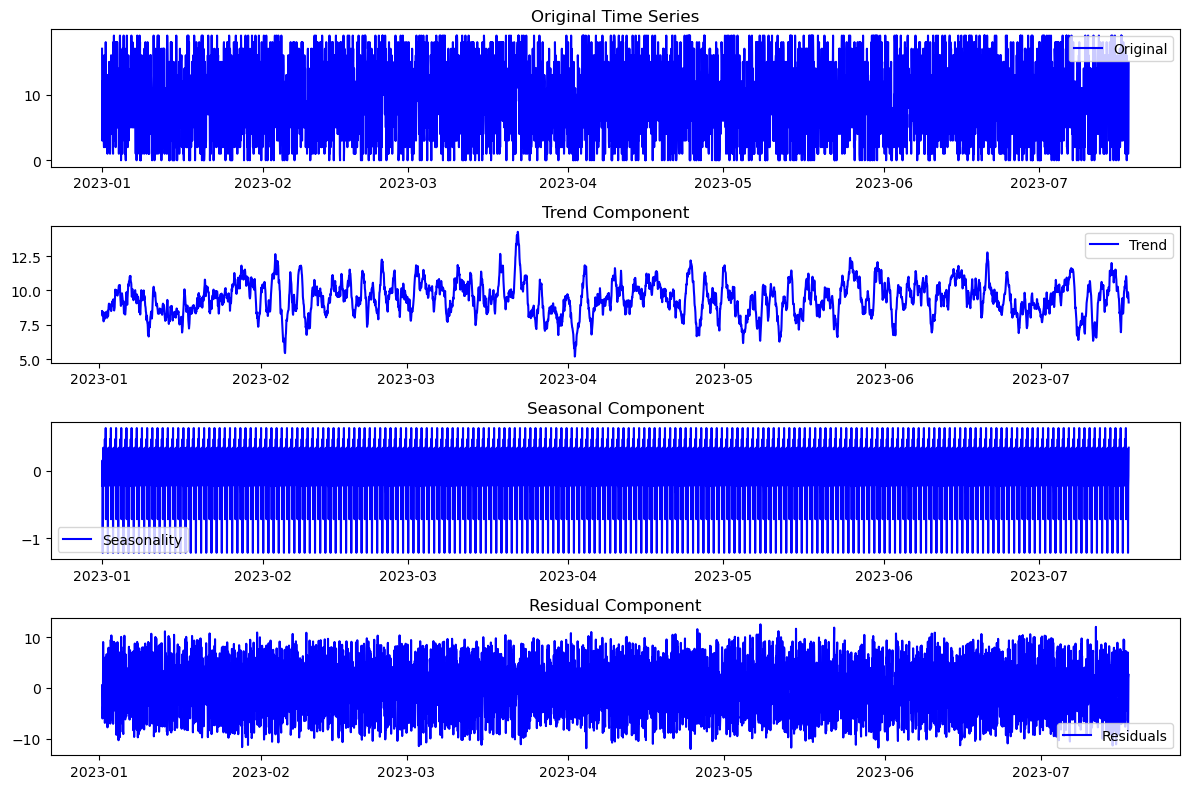

In [225]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

def decompose_and_plot(cleaned_data, column='vehicle_count', freq=12):
    """
    Decompose a time series into trend, seasonality, and residuals using seasonal_decompose,
    and plot the decomposed components.
    
    Parameters:
    - cleaned_data (pd.DataFrame): The cleaned dataset with a datetime index.
    - column (str): The specific column to decompose (default: 'vehicle_count').
    - freq (int): Frequency of seasonality (default: 12 for monthly seasonality).
    
    Returns:
    - None (plots the decomposed components).
    """
    # Ensure the column is in the DataFrame
    if column not in cleaned_data.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame.")
    
    # Ensure the DataFrame has a datetime index
    if not isinstance(cleaned_data.index, pd.DatetimeIndex):
        raise ValueError("The DataFrame index must be a DatetimeIndex.")
    
    # Extract the time series data
    ts = cleaned_data[column].dropna()

    # Decompose the time series using seasonal_decompose
    decomposition = seasonal_decompose(ts, model='additive', period=freq)

    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plot the gathered statistics
    plt.figure(figsize=(12, 8))
    
    # Original time series
    plt.subplot(411)
    plt.plot(ts.index, ts.values, label='Original', color='blue')
    plt.legend(loc='best')
    plt.title('Original Time Series')
    
    # Trend component
    plt.subplot(412)
    plt.plot(ts.index, trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title('Trend Component')
    
    # Seasonal component
    plt.subplot(413)
    plt.plot(ts.index, seasonal, label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonal Component')
    
    # Residual component
    plt.subplot(414)
    plt.plot(ts.index, residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title('Residual Component')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Example usage:

# Perform decomposition and plot components
decompose_and_plot(cleaned_data, column='vehicle_count', freq=24)


### observation 
The vehicle count time series has an upward and downward trends at different intervals 

From the seasonal plot the data has spikes and it is therefore seasonal

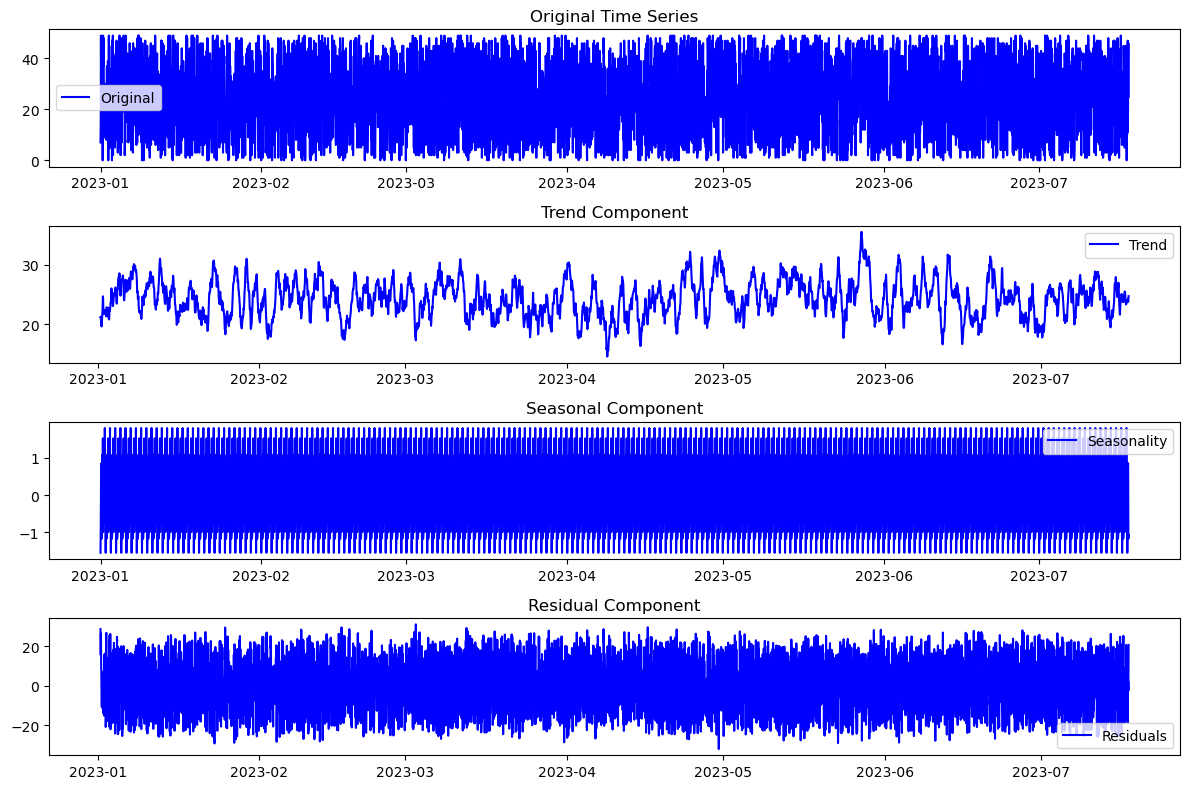

In [226]:
# Perform decomposition and plot components
decompose_and_plot(cleaned_data, column='pedestrian_count', freq=24)

### observations
The people count time series has an upward and downward trends at different intervals

From the seasonal plot the data has less spikes compared to our vehicle count time series.It is seasonal

Before the actual modeling I’ll first preprocess the data, focusing on the time series features. This includes:

* Handling Categorical Variables: Converting categorical features like congestion_level, weather_condition, and location into numeric values.
  
* Resampling: Aggregating the data based on a suitable time interval if needed (e.g., hourly or daily).
  
* Stationarity Check: Checking if the time series is stationary, as ARIMA requires stationarity. If it's not stationary, we'll apply transformations like differencing or moving average.

In [227]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in ['congestion_level', 'weather_condition', 'location']:
    labe_en = LabelEncoder()
    cleaned_data[column] = labe_en.fit_transform(cleaned_data[column])
    label_encoders[column] = labe_en

# Resampling the data to hourly intervals (if not already in that format)
# Since the data is already hourly, we'll skip resampling for now.

# Checking for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries)
    return result[1]  # p-value

# Check stationarity of vehicle_count
vehicle_count_stationarity = check_stationarity(cleaned_data['vehicle_count'])

# Check stationarity of pedestrian_count
pedestrian_count_stationarity = check_stationarity(cleaned_data['pedestrian_count'])

vehicle_count_stationarity, pedestrian_count_stationarity

(0.0, 0.0)

The p-values from the Augmented Dickey-Fuller test are both 0.0, which indicates that both the vehicle_count and pedestrian_count time series are stationary. We proceed to directly fitting the ARIMA and SARIMA models without needing to apply any transformations for stationarity.

#### VEHICLE_COUNT

### Model 1. BASELINE MODEL Naive Forecast

Baseline model is a simple model that anyone can come up with. In time series, this is a model that proves that the current value is a true reflection of previous value.I go ahead to create a simple naive forecast model.

In [228]:
# Extracting the 'vehicle_count' time series
vehicle_count = cleaned_data['vehicle_count']

# Naive forecast: predicting the next value to be the last observed value
y_pred_naive = vehicle_count.shift(1).fillna(method='bfill')  # Backfill to handle NaN at the start

# Evaluate the baseline model (using Mean Absolute Error )
mae_naive = np.mean(np.abs(y_pred_naive - vehicle_count))
print(f'Baseline MAE (Naive Forecast): {mae_naive:.3f}')

Baseline MAE (Naive Forecast): 6.514


#### observation

The forecast reflects true values of the vehicle count

In [229]:
# Select relevant columns
ts = cleaned_data[['location', 'vehicle_count', 'pedestrian_count', 'congestion_level','weather_condition', 
                   'temperature']]

In [230]:
ts = pd.DataFrame(ts)

### MODEL 2:ARIMA

We  will find the number of required AR terms by inspecting the PACF plot and also find the required terms of MA by 
inspecting the ACF plot

ARIMA Order (p, d, q):

p: The number of lag observations included in the model (autoregressive part).

d: The number of times that the raw observations are differenced (to make the series stationary).

q: The size of the moving average window (moving average part).

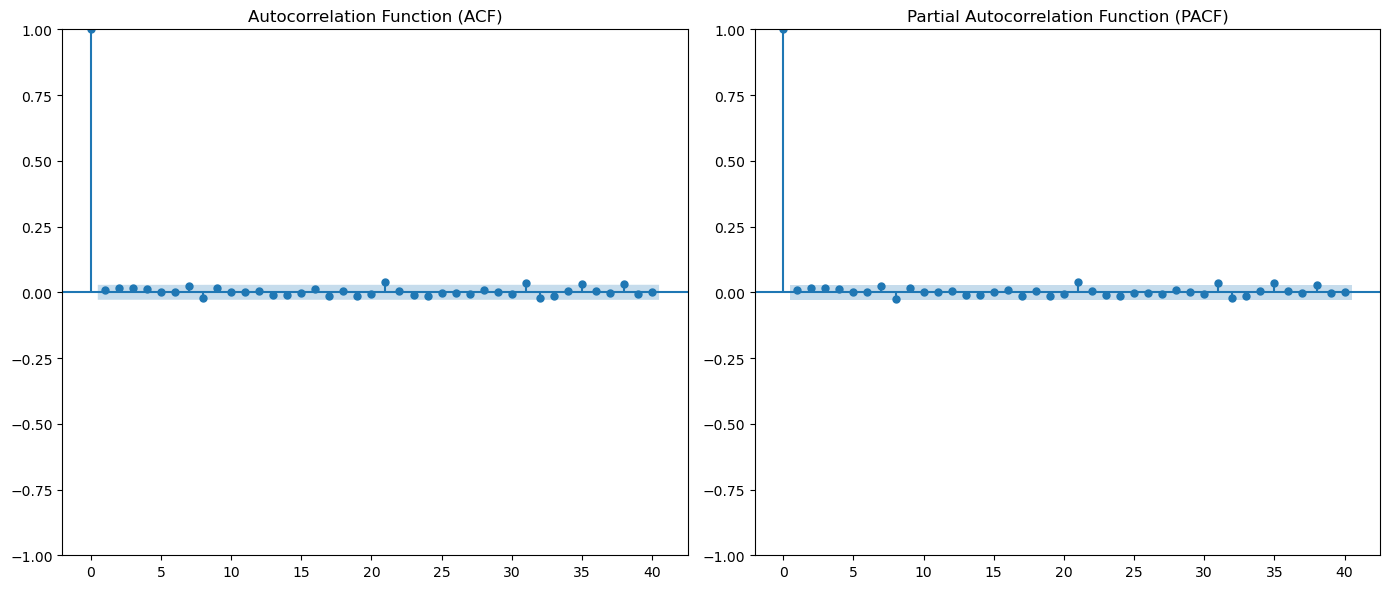

In [231]:
# Plot the ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(121)
plot_acf(vehicle_count, lags=40, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(122)
plot_pacf(vehicle_count, lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


Forecasted Vehicle count:


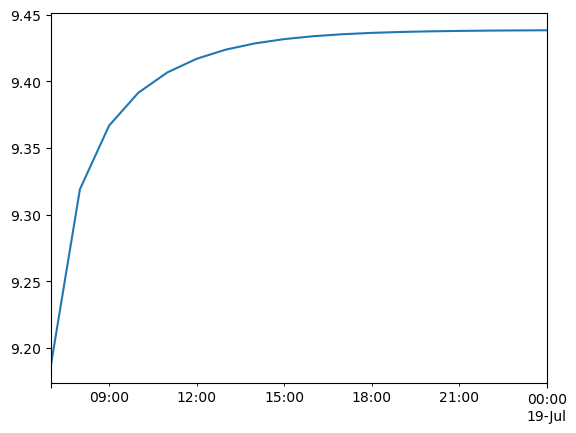

In [232]:
#import the library
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARIMA model for vehicle_count
# We'll use  ARIMA model (p,d,q) = (2,0,2)
arima_order = (2, 0, 2)
arima_model_vehicle = ARIMA(ts['vehicle_count'], order=arima_order)
arima_result_vehicle = arima_model_vehicle.fit()

# Summary of the ARIMA model
arima_summary_vehicle = arima_result_vehicle.summary()

# Predict the next 18 time steps for vehicle_count
# Evaluating the model and making forecasts
vehicle_forecast = arima_result_vehicle.forecast(steps=18)

# Printing the forecasted values
print("Forecasted Vehicle count:")
vehicle_forecast.plot();

In [233]:
#print the summary of vehicle count
arima_summary_vehicle

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          vehicle_count   No. Observations:                 4759
Model:                 ARIMA(2, 0, 2)   Log Likelihood              -14996.078
Date:                Wed, 14 Aug 2024   AIC                          30004.157
Time:                        09:52:05   BIC                          30042.963
Sample:                    01-01-2023   HQIC                         30017.792
                         - 07-18-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4386      0.088    107.814      0.000       9.267       9.610
ar.L1          0.8682      1.326      0.655      0.513      -1.731       3.467
ar.L2         -0.1270      1.120     -0.113      0.910      -2.322       2.068
ma.L1         -0.8614      1.325     -0.650      0.515      -3.457       1.735
ma.L2          0.1378      1.102      0.125      0.900      -2.022       2.298
sigma2        31.9550      1.019     31.356      0.000      29.958      33.952
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               272.76
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.56   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Observation

From the forecasted vehicle count we noted the folllowing

From 8:00am the vehicle count is relatively low and gradually increases at 9:00am and continues to rise upto 1200 hrs where it 

reaches an optimum count at around 1300hrs and remains almost the same all the way

In [234]:
# Calculating AIC value
aic_value = 30004.157
aic_value

30004.157

The AIC (Akaike Information Criterion) is a measure used to evaluate the goodness of fit of a statistical model. It balances the trade-off between the complexity of the model and its goodness of fit to the data. In the context of time series analysis and the ARIMA model, a lower AIC value indicates a better-fitting model.

The lower the AIC value, the better the model fits the data

### MODEL 3:SARIMA

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.27510D+00    |proj g|=  7.32954D-02


 This problem is unconstrained.



At iterate    5    f=  3.16177D+00    |proj g|=  2.06420D-02

At iterate   10    f=  3.15495D+00    |proj g|=  1.59727D-02

At iterate   15    f=  3.15121D+00    |proj g|=  6.20265D-03

At iterate   20    f=  3.15084D+00    |proj g|=  1.29419D-03

At iterate   25    f=  3.15081D+00    |proj g|=  7.27939D-05

At iterate   30    f=  3.15081D+00    |proj g|=  2.92837D-04

At iterate   35    f=  3.15077D+00    |proj g|=  1.57526D-03

At iterate   40    f=  3.15075D+00    |proj g|=  6.14719D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     56      1     0     0   9.045D-06   3.151D+00
  F =   3.15075289179

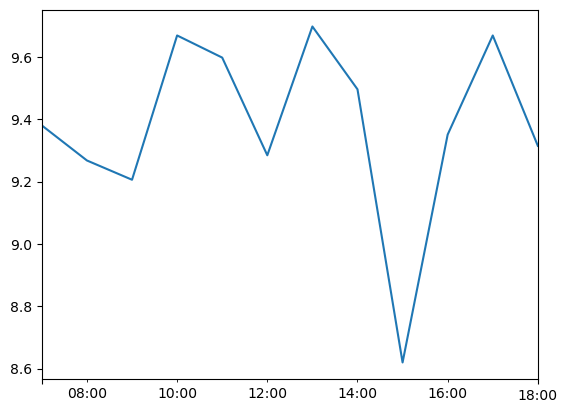

In [235]:
# Define the SARIMA model with seasonal parameters
# SARIMA(p, d, q)(P, D, Q, s)
sarima_order = (2, 0, 2)  # Non-seasonal part
seasonal_order = (1, 1, 1, 12)  # Seasonal part: (P, D, Q, s)

sarima_model_vehicle = SARIMAX(ts['vehicle_count'], 
                               order=sarima_order, 
                               seasonal_order=seasonal_order)
sarima_result_vehicle = sarima_model_vehicle.fit()

# Forecast the next 10 time steps
vehicle_sarima_forecast = sarima_result_vehicle.forecast(steps=12)
# Printing the forecasted values
print("Forecasted Vehicle count:")
vehicle_sarima_forecast.plot();

In [236]:
# Print the summary of the SARIMA model
sarima_result_vehicle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                        vehicle_count   No. Observations:                 4759
Model:             SARIMAX(2, 0, 2)x(1, 1, [1], 12)   Log Likelihood              -14994.433
Date:                              Wed, 14 Aug 2024   AIC                          30002.866
Time:                                      09:52:18   BIC                          30048.123
Sample:                                  01-01-2023   HQIC                         30018.770
                                       - 07-18-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9853      1.327      0.743      0.458      -1.615       3.586
ar.L2         -0.2160      1.113     -0.194      0.846      -2.397       1.965
ma.L1         -0.9779      1.324     -0.738      0.460      -3.574       1.618
ma.L2          0.2248      1.093      0.206      0.837      -1.917       2.366
ar.S.L12       0.0066      0.015      0.445      0.656      -0.023       0.036
ma.S.L12      -0.9983      0.007   -133.401      0.000      -1.013      -0.984
sigma2        32.0072      1.020     31.377      0.000      30.008      34.007
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               258.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.01
Prob(H) (two-sided):                  0.62   Kurtosis:                         1.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### observation

From the forecasted vehicle count with sarima model we noted the folllowing

From 8:00am the vehicle count is relatively decreasing all the way to few minutes to 10:00am where the count shoots up and at around 12:00pm the count start to reduce significantly and then rises from 2:00pm to 3:00pm the vehicle count drops drastically and at around 1500hrs the count then increases drastically 

In [237]:
# Calculating AIC value
aic_value = 30002.866
aic_value

30002.866

### PEDESTRIAN_COUNT

### Model 1. ARIMA MODEL

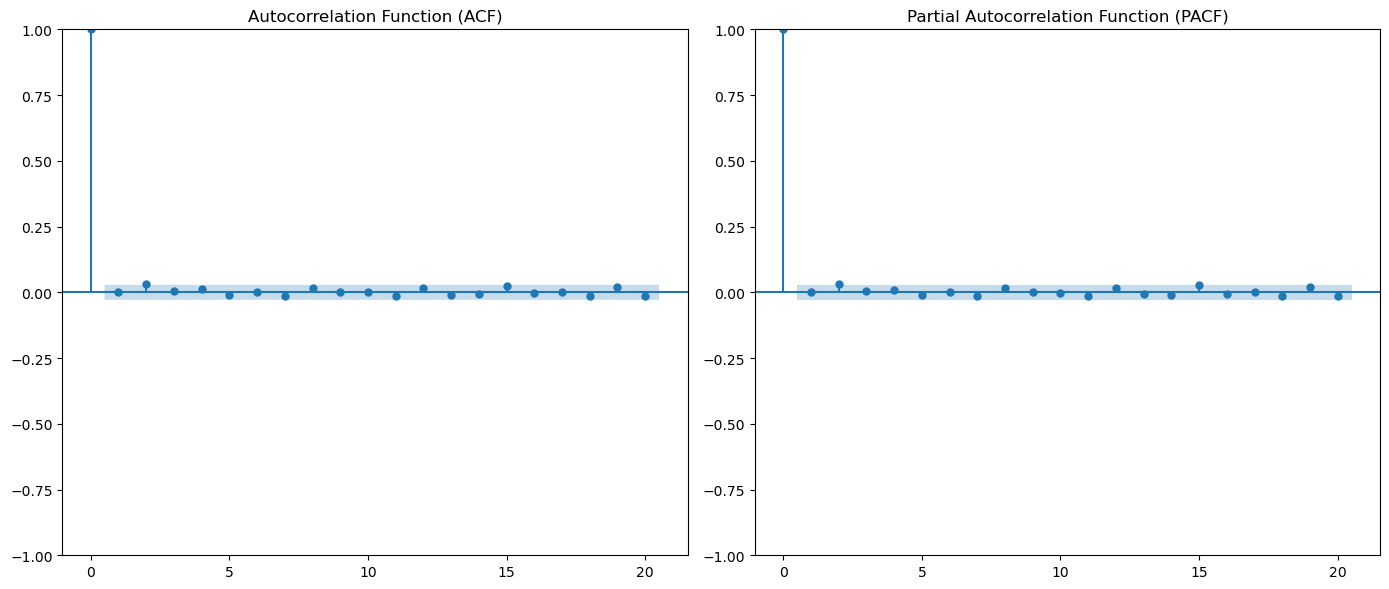

In [238]:
pedestrian_count = cleaned_data["pedestrian_count"]
# Plot the ACF and PACF
plt.figure(figsize=(14, 6))

# ACF plot
plt.subplot(121)
plot_acf(pedestrian_count, lags=20, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')

# PACF plot
plt.subplot(122)
plot_pacf(pedestrian_count, lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()


Forecasted pedestrian count:


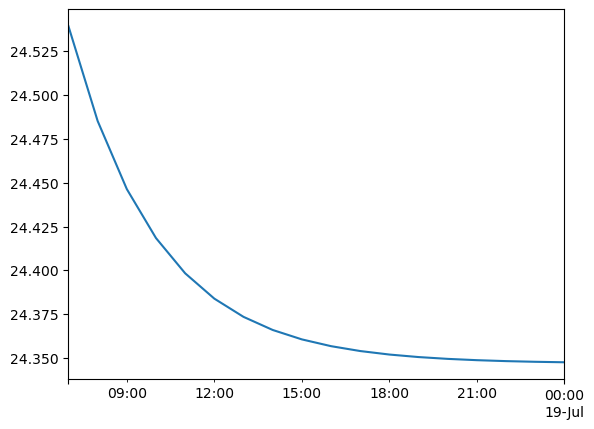

In [239]:
# Fit an ARIMA model for people_count
# We'll use a simple ARIMA model (p,d,q) = (1,0,1) as a starting point
arima_order = (1, 0, 1)
arima_model_people = ARIMA(ts['pedestrian_count'], order=arima_order)
arima_result_people = arima_model_people.fit()

# Summary of the ARIMA model
arima_summary_people = arima_result_people.summary()


# Evaluating the model and making forecasts
people_forecast = arima_result_people.forecast(steps=18)

# Printing the forecasted values
print("Forecasted pedestrian count:")
people_forecast.plot();


In [240]:
#print the summary of pedestrian  count
arima_summary_people

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:       pedestrian_count   No. Observations:                 4759
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -19483.780
Date:                Wed, 14 Aug 2024   AIC                          38975.561
Time:                        09:52:18   BIC                          39001.432
Sample:                    01-01-2023   HQIC                         38984.651
                         - 07-18-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3470      0.220    110.773      0.000      23.916      24.778
ar.L1          0.7191      0.399      1.804      0.071      -0.062       1.501
ma.L1         -0.7067      0.406     -1.741      0.082      -1.502       0.089
sigma2       210.6757      6.881     30.616      0.000     197.189     224.163
===================================================================================
Ljung-Box (L1) (Q):                   0.60   Jarque-Bera (JB):               291.17
Prob(Q):                              0.44   Prob(JB):                         0.00
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.90   Kurtosis:                         1.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### observation

The forecasted pedestrian count forms a curve where the number of pedestrian count at 8pm is the highest and then reduces over time forming rectangular hyperbola.

In [241]:
# Calculating AIC value
aic_value = 38975.561
aic_value

38975.561

### Model 2.SARIMA MODEL

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.21046D+00    |proj g|=  7.38729D-02

At iterate    5    f=  4.09450D+00    |proj g|=  6.96506D-02

At iterate   10    f=  4.09150D+00    |proj g|=  3.73971D-04

At iterate   15    f=  4.09144D+00    |proj g|=  7.70412D-03

At iterate   20    f=  4.09109D+00    |proj g|=  1.82414D-03

At iterate   25    f=  4.09108D+00    |proj g|=  5.95509D-05

At iterate   30    f=  4.09107D+00    |proj g|=  8.02116D-04

At iterate   35    f=  4.09105D+00    |proj g|=  2.68840D-04

At iterate   40    f=  4.09105D+00    |proj g|=  2.32830D-04

At iterate   45    f=  4.09105D+00    |proj g|=  1.37472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

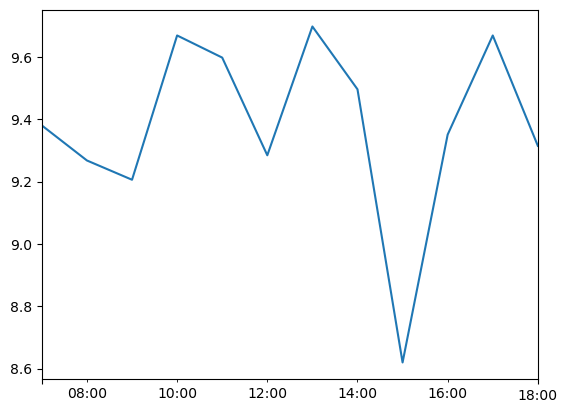

In [242]:
# Define the SARIMA model with seasonal parameters
# SARIMA(p, d, q)(P, D, Q, s)
sarima_order = (1, 0, 1)  # Non-seasonal part
seasonal_order = (1, 1, 1, 12)  # Seasonal part: (P, D, Q, s)

sarima_model_people = SARIMAX(ts['pedestrian_count'], 
                               order=sarima_order, 
                               seasonal_order=seasonal_order)
sarima_result_people = sarima_model_people.fit()

# Forecast the next 10 time steps
pedestrian_sarima_forecast = sarima_result_people.forecast(steps=10)
# Printing the forecasted values
print("Forecasted pedestrian count:")
vehicle_sarima_forecast.plot();

In [243]:
#print the summary of pedestrian  count
sarima_result_people.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                   pedestrian_count   No. Observations:                 4759
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood              -19469.296
Date:                            Wed, 14 Aug 2024   AIC                          38948.591
Time:                                    09:52:27   BIC                          38980.918
Sample:                                01-01-2023   HQIC                         38959.951
                                     - 07-18-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6994      0.411      1.702      0.089      -0.106       1.505
ma.L1         -0.6861      0.418     -1.640      0.101      -1.506       0.134
ar.S.L12       0.0156      0.015      1.059      0.290      -0.013       0.044
ma.S.L12      -0.9998      0.075    -13.304      0.000      -1.147      -0.853
sigma2       210.5942     16.885     12.472      0.000     177.500     243.688
===================================================================================
Ljung-Box (L1) (Q):                   0.65   Jarque-Bera (JB):               272.02
Prob(Q):                              0.42   Prob(JB):                         0.00
Heteroskedasticity (H):               1.00   Skew:                             0.02
Prob(H) (two-sided):                  0.93   Kurtosis:                         1.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Observation

From the forecasted pedestrian count with sarima model we noted the folllowing

From 8:00am the pedestrian count is relatively decreasing all the way to few minutes to 10:00am where the count shoots up and at around 11:00pm the count start to reduce significantly and then rises from 12:00pm to 3:00pm the pedestrian count drops drastically and at around 1500hrs the count then increases drastically 

In [244]:
# Calculating AIC value
aic_value = 38948.591
aic_value

38948.591

### CONGESTION LEVELS

Since Congestion levels are categorical that is low,high and medium i went ahead to use classification approach

In [245]:
#target variable
y = ts["congestion_level"]
#independent variable
X = ts.drop(columns = ["congestion_level"],axis = 1)
#test_size = 25%
# random_state = 42
# perform a train and test _split
X_train,X_test,y_train,y_test = train_test_split( X , y , test_size = 0.25 , random_state  = 42)
#scale the data
#initialize the scaler
scaler = StandardScaler()

#fit the data on the scaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model 1.Decision Tree

In [246]:
#import the library
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
# instantiating and fitting decision tree model
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42) 
tree_clf.fit(X_train_scaled, y_train)
#predicting
y_pred = tree_clf.predict(X_test_scaled)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy score: ',accuracy_score(y_test, y_pred))

[[214 144  29]
 [240 140  27]
 [246 117  33]]
              precision    recall  f1-score   support

           0       0.31      0.55      0.39       387
           1       0.35      0.34      0.35       407
           2       0.37      0.08      0.14       396

    accuracy                           0.33      1190
   macro avg       0.34      0.33      0.29      1190
weighted avg       0.34      0.33      0.29      1190

Accuracy score:  0.32521008403361346


#### observation

* High congestion - 0
  
  Had the highest recall score of 0.55,this shows that the model was able to identify 55% cases of high congestion
  
* low congestion  - 1
  
  Recall score of 0.34 ,this shows that the model was able to identify 34% cases of low congestion
  
* medium congestion - 2
  
  Recall score of 0.08,this shows the model was able to identify 8% cases of medium congestion
  
* The overall model accuracy was 32.52%

### Model 2 .Random forest

In [247]:
# Instanstiate a random forest classifier
random_forest = RandomForestClassifier(random_state=42)

# fit Random forest Cclassifier
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test, y_pred))

[[128 137 122]
 [119 150 138]
 [134 141 121]]
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       387
           1       0.35      0.37      0.36       407
           2       0.32      0.31      0.31       396

    accuracy                           0.34      1190
   macro avg       0.33      0.33      0.33      1190
weighted avg       0.33      0.34      0.33      1190

accuracy score:  0.3352941176470588


#### observation

* High congestion - 0
  
  Had a recall score of 0.33,this shows that the model was able to identify 33% cases of high congestion
  
* low congestion  - 1
  
  Recall score of 0.37 ,this shows that the model was able to identify 37% cases of low congestion
  
* medium congestion - 2
  
  Recall score of 0.31,this shows the model was able to identify 31% cases of medium congestion
  
* The overall model accuracy was 33.53%

### Model 3 .XGboost

In [248]:
# Instanstiate XGBoost classifier
X_GBoost = XGBClassifier(random_state=42)

# fit Random forest Cclassifier
X_GBoost.fit(X_train_scaled, y_train)

#predict
y_pred = X_GBoost.predict(X_test_scaled)

# confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy score: ',accuracy_score(y_test, y_pred))

[[124 137 126]
 [117 130 160]
 [126 133 137]]
              precision    recall  f1-score   support

           0       0.34      0.32      0.33       387
           1       0.33      0.32      0.32       407
           2       0.32      0.35      0.33       396

    accuracy                           0.33      1190
   macro avg       0.33      0.33      0.33      1190
weighted avg       0.33      0.33      0.33      1190

accuracy score:  0.32857142857142857


#### observation

* High congestion - 0
  
  Had a recall score of 0.32,this shows that the model was able to identify 32% cases of high congestion
  
* low congestion  - 1
  
  Recall score of 0.32 ,this shows that the model was able to identify 32% cases of low congestion
  
* medium congestion - 2
  
  Recall score of 0.35,this shows the model was able to identify 35% cases of medium congestion
  
* The overall model accuracy was 32.86%

Noted the accuracy is low in the models i went ahead to try and solve the problem and did hyperparameter tunning

#### Exploring Models With Pipelines & Grid Search

#### Preparing Functions and Generic Parameters

I opted to streamline the modeling process with sklearn pipelines and GridSearchCV to help choose the best hyperparamters for optimized accuracy. I began by writing a function to create a pipeline given a classifier and a function to create a grid search using a pipeline and predetermined paramaters.

In [249]:
# function to make a pipeline with classifier input
def pipe_maker(classifier):
    '''Takes in a classifier, returns a pipeline'''
    pipe = Pipeline([('scl', StandardScaler()),
                    ('clf', classifier(class_weight= 'balanced', random_state=42))])
    return pipe

In [250]:
# function to create a grid search containing pipeline
def gridsearch_maker(pipeline, params):
    '''Takes in a pipeline and param grid, returns GridSearchCV object'''
    return GridSearchCV(estimator=pipeline,
                        param_grid=params,
                        scoring='accuracy',
                        cv=5,
                        n_jobs=-1)

In [251]:
# setting generic grid search parameters
param_range = [1, 2, 3, 4, 5,6,7,8,9,10]
param_range_small = [1.0, 0.5, 0.1]

In [252]:
def plot_confusion_matrix(y_test, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='RdGy', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

In [253]:
# function to find the best hyperparameters to optimize accuracy for a given model,
# print the classification report for the model with the best parameters, and
# print the confusion matrix for this model as well.
def find_best_accuracy(gridsearch):
    
    # fitting the grid search objects
    best_accuracy = 0.0
    # fitting grid search
    gridsearch.fit(X_train_scaled, y_train)
    # best params
    print('Best params: %s' % gridsearch.best_params_)
    # best training data accuracy
    print('Best training accuracy: %.3f' % gridsearch.best_score_)
    # predict on test data with best params
    y_pred = gridsearch.predict(X_test_scaled)
    # test data accuracy with best params
    print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test, y_pred))
    # confusion matrix and classification report
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print('Accuracy score: ',accuracy_score(y_test, y_pred))
    # plotting confusion matrix
    plot_confusion_matrix(y_test, y_pred, [0,1])

### Model 4 - Decision Trees with pipelines and Grid Search

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}
Best training accuracy: 0.343
Test set accuracy score for best params: 0.313 
[[187 142  58]
 [208 137  62]
 [217 130  49]]
              precision    recall  f1-score   support

           0       0.31      0.48      0.37       387
           1       0.33      0.34      0.34       407
           2       0.29      0.12      0.17       396

    accuracy                           0.31      1190
   macro avg       0.31      0.31      0.29      1190
weighted avg       0.31      0.31      0.29      1190

Accuracy score:  0.3134453781512605


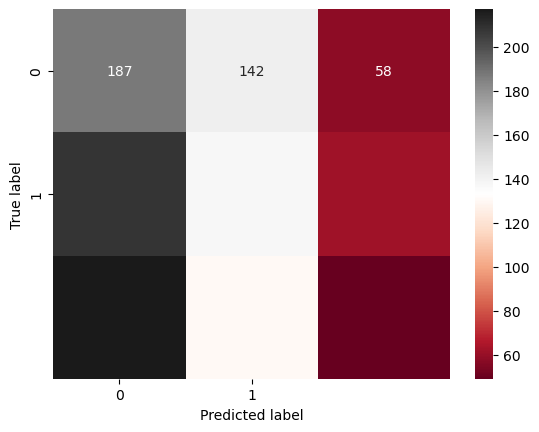

In [254]:
#import the library
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#from sklearn.metrics import ConfusionMatrixDisplay   

# fitting decision tree pipeline
pipe_DT = pipe_maker(DecisionTreeClassifier)

# setting grid search parameters
grid_params_Dt = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_DT = gridsearch_maker(pipe_DT, grid_params_Dt)

# finding best parameters for accuracy
find_best_accuracy(gs_DT)

#### observation

* High congestion - 0
  
  Had a recall score of 0.48,this shows that the model was able to identify 48% cases of high congestion
  
* low congestion  - 1
  
  Recall score of 0.34 ,this shows that the model was able to identify 34% cases of low congestion
  
* medium congestion - 2
  
  Recall score of 0.12,this shows the model was able to identify 12% cases of medium congestion
  
* The overall model accuracy was 31.34%

### Model 5 - Random Forest with pipelines and Grid Search

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 3, 'clf__min_samples_leaf': 10, 'clf__min_samples_split': 2}
Best training accuracy: 0.335
Test set accuracy score for best params: 0.309 
[[109 144 134]
 [126 122 159]
 [115 144 137]]
              precision    recall  f1-score   support

           0       0.31      0.28      0.30       387
           1       0.30      0.30      0.30       407
           2       0.32      0.35      0.33       396

    accuracy                           0.31      1190
   macro avg       0.31      0.31      0.31      1190
weighted avg       0.31      0.31      0.31      1190

Accuracy score:  0.3092436974789916


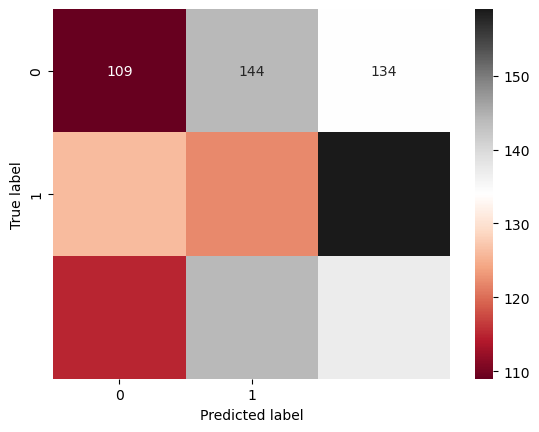

In [255]:
# fitting Random Forest pipeline
pipe_rf = pipe_maker(RandomForestClassifier)

# setting grid search parameters
grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                   'clf__min_samples_leaf': param_range,
                   'clf__max_depth': param_range,
                   'clf__min_samples_split': param_range[1:]}]

# creating grid search object
gs_rf = gridsearch_maker(pipe_rf, grid_params_rf)

# finding best parameters for accuracy
find_best_accuracy(gs_rf)

#### observation

* High congestion - 0
  
  Had a recall score of 0.28,this shows that the model was able to identify 28% cases of high congestion
  
* low congestion  - 1
  
  Recall score of 0.30 ,this shows that the model was able to identify 30% cases of low congestion
  
* medium congestion - 2
  
  Recall score of 0.35,this shows the model was able to identify 35% cases of medium congestion
  
* The overall model accuracy was 30.92%

#### EVALUATION

We will use both accuracy and recall to evaluate our model performance

Recall is a metric that measures the model's ability to identify true positive cases out of all actual positive cases and Accuracy is a general measure of model performance.


In [258]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

#  predictions from each model 
rf_predictions = random_forest.predict(X_test_scaled)    # Random forest
dt_predictions = tree_clf.predict(X_test_scaled) # Decision Tree predictions
xgb_predictions = X_GBoost.predict(X_test_scaled)  # XGBoost predictions

# Decision Tree evaluation
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, dt_predictions))
print("Accuracy:", accuracy_score(y_test, dt_predictions))


# Random Forest evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))
print("Accuracy:", accuracy_score(y_test, rf_predictions))


# XGBoost evaluation
print("\nXGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Accuracy:", accuracy_score(y_test, xgb_predictions))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.55      0.39       387
           1       0.35      0.34      0.35       407
           2       0.37      0.08      0.14       396

    accuracy                           0.33      1190
   macro avg       0.34      0.33      0.29      1190
weighted avg       0.34      0.33      0.29      1190

Accuracy: 0.32521008403361346
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.33      0.33       387
           1       0.35      0.37      0.36       407
           2       0.32      0.31      0.31       396

    accuracy                           0.34      1190
   macro avg       0.33      0.33      0.33      1190
weighted avg       0.33      0.34      0.33      1190

Accuracy: 0.3352941176470588

XGBoost Classification Report:
              precision    recall  f1-score   support

           0     

In [261]:
from sklearn.metrics import  recall_score

# Random Forest predictions
rf_predictions = random_forest.predict(X_test_scaled)

# Decision Tree predictions
dt_predictions = tree_clf.predict(X_test_scaled)

# XGBoost predictions
xgb_predictions = X_GBoost.predict(X_test_scaled)

# Decision Tree evaluation
dt_recall = recall_score(y_test, dt_predictions, average=None)
print("\nDecision Tree Recall Scores:")
print(f"Recall Scores per class: {dt_recall}")
print("Average Recall (macro):", recall_score(y_test, dt_predictions, average='macro'))

# Random Forest evaluation
rf_recall = recall_score(y_test, rf_predictions, average=None)
print("\nRandom Forest Recall Scores:")
print(f"Recall Scores per class: {rf_recall}")
print("Average Recall (macro):", recall_score(y_test, rf_predictions, average='macro'))

# XGBoost evaluation
xgb_recall = recall_score(y_test, xgb_predictions, average=None)
print("\nXGBoost Recall Scores:")
print(f"Recall Scores per class: {xgb_recall}")
print("Average Recall (macro):", recall_score(y_test, xgb_predictions, average='macro'))



Decision Tree Recall Scores:
Recall Scores per class: [0.55297158 0.34398034 0.08333333]
Average Recall (macro): 0.32676175118035583

Random Forest Recall Scores:
Recall Scores per class: [0.33074935 0.36855037 0.30555556]
Average Recall (macro): 0.334951759370364

XGBoost Recall Scores:
Recall Scores per class: [0.32041344 0.31941032 0.3459596 ]
Average Recall (macro): 0.3285944506874739


#### comments

From the accuracy summary and recall summary we noted the following:

Best model - Random forest  : Accuracy - 34%
                             
                             :Recall  - 33.5%
                             
                        
second model - XGBoost : Accuracy - 32.85%

                        :Recall  - 32.9%
                        
third model - Decision Trees : Accuracy - 32.5%

                        :Recall  - 32.6%
                        

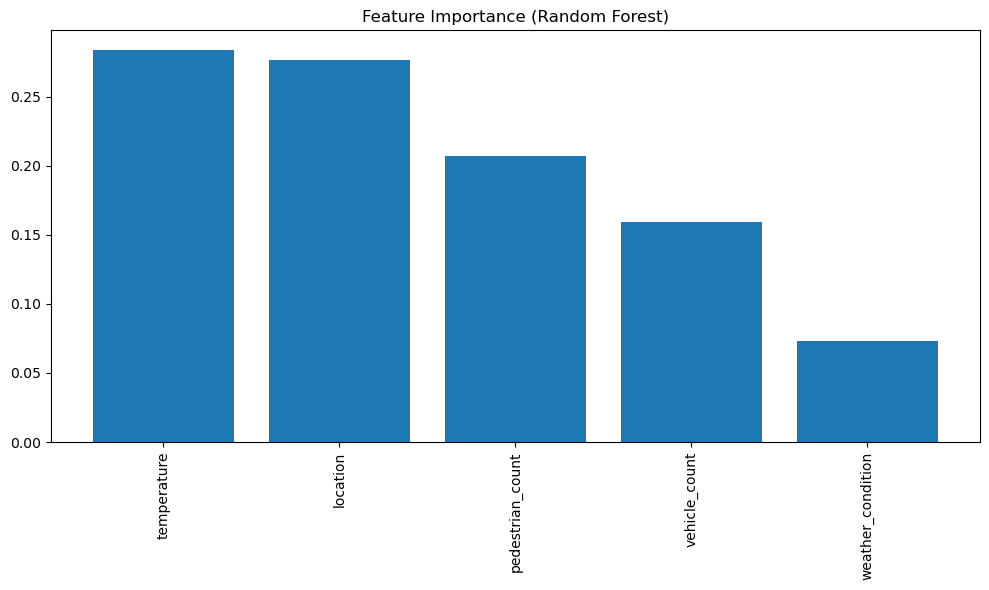

In [262]:
import matplotlib.pyplot as plt

# Feature importance for Random Forest
importances = random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#### observation

For Random forest model temperature,location and pedestrian count are the features that heavily affected congestion levels while weather condition as a feature came last

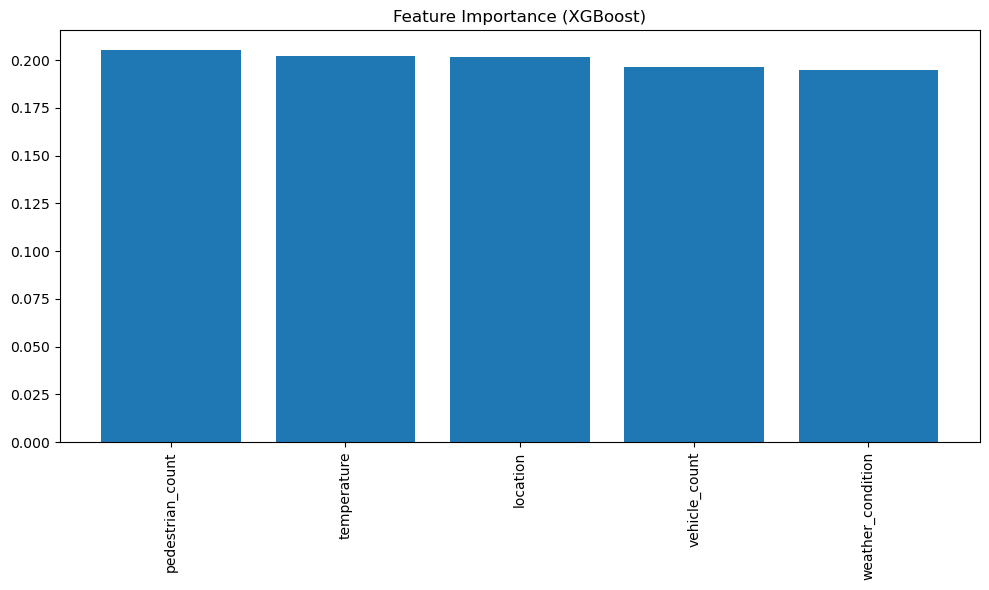

In [263]:
# Feature importance for XGBoost 
importances = X_GBoost.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.tight_layout()
plt.show()

#### observation

For XGboost model  pedestrian count,temperature and location in that order are the features that heavily affected congestion levels while weather condition as a feature came last

We will also try the lightgbn model and try and predict some values.

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error

# Load the dataset
data = pd.read_csv('traffic_data1 (1).csv', parse_dates=['timestamp'])

# Check for any missing values and fill them
data.fillna(method='ffill', inplace=True)

# Convert `timestamp` to datetime and set it as the index
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

# Derive `day_of_week` from the `timestamp`
data['day_of_week'] = data.index.dayofweek  # Monday=0, Sunday=6

# Define categorical columns
categorical_columns = ['weather_condition']

# Convert categorical columns to category type
data[categorical_columns] = data[categorical_columns].astype('category')

# Ensure numerical columns are of numeric type
data['congestion_level'] = pd.to_numeric(data['congestion_level'], errors='coerce')

# Create the DataFrames for vehicle and pedestrian data
vehicle_data = data[['hour', 'day_of_week', 'temperature', 'congestion_level', 'vehicle_count'] + categorical_columns]
pedestrian_data = data[['hour', 'day_of_week', 'temperature', 'congestion_level', 'pedestrian_count'] + categorical_columns]

# Separate features and targets for both vehicle and pedestrian data
vehicle_features = vehicle_data.drop('vehicle_count', axis=1)
vehicle_target = vehicle_data['vehicle_count']

pedestrian_features = pedestrian_data.drop('pedestrian_count', axis=1)
pedestrian_target = pedestrian_data['pedestrian_count']

# Split the data into training and testing sets for both vehicle and pedestrian models
X_train_vehicle, X_test_vehicle, y_train_vehicle, y_test_vehicle = train_test_split(
    vehicle_features, vehicle_target, test_size=0.2, random_state=42)

X_train_pedestrian, X_test_pedestrian, y_train_pedestrian, y_test_pedestrian = train_test_split(
    pedestrian_features, pedestrian_target, test_size=0.2, random_state=42)

# Initialize and train the LightGBM models for vehicle and pedestrian counts
vehicle_lgb = lgb.LGBMRegressor(
    learning_rate=0.1, 
    num_leaves=31, 
    n_estimators=100
)

pedestrian_lgb = lgb.LGBMRegressor(
    learning_rate=0.1, 
    num_leaves=31, 
    n_estimators=100
)

# Fit the models
vehicle_lgb.fit(X_train_vehicle, y_train_vehicle, categorical_feature=categorical_columns)
pedestrian_lgb.fit(X_train_pedestrian, y_train_pedestrian, categorical_feature=categorical_columns)

# Example feature set for prediction
example_features = pd.DataFrame({
    'hour': [10],  # Example hour (10 AM)
    'day_of_week': [2],  # Example day (Tuesday)
    'temperature': [22],  # Example temperature (22°C)
    'congestion_level': [3],  # Example congestion level (ensure this is numeric)
    'weather_condition': ['sunny'],  # Example categorical value
})

# Ensure categorical columns are handled properly
example_features[categorical_columns] = example_features[categorical_columns].astype('category')

# Ensure columns align with training data and set categorical features
example_features = example_features.reindex(columns=X_train_vehicle.columns, fill_value=0)

# Predict traffic counts for vehicles and pedestrians
predicted_vehicle_count = round(vehicle_lgb.predict(example_features)[0])
predicted_pedestrian_count = round(pedestrian_lgb.predict(example_features)[0])

print(f'Predicted Vehicle Count: {predicted_vehicle_count}')
print(f'Predicted Pedestrian Count: {predicted_pedestrian_count}')

# Evaluate the models using Mean Absolute Error (MAE)
vehicle_mae = mean_absolute_error(y_test_vehicle, vehicle_lgb.predict(X_test_vehicle))
pedestrian_mae = mean_absolute_error(y_test_pedestrian, pedestrian_lgb.predict(X_test_pedestrian))

print(f'Vehicle Model MAE: {vehicle_mae}')
print(f'Pedestrian Model MAE: {pedestrian_mae}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000767 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 3807, number of used features: 4
[LightGBM] [Info] Start training from score 9.477541
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 291
[LightGBM] [Info] Number of data points in the train set: 3807, number of used features: 4
[LightGBM] [Info] Start training from score 24.362753
Predicted Vehicle Count: 11
Predicted Pedestrian Count: 24
Vehicle Model MAE: 4.955753857896084
Pedestrian Model MAE: 13.014146093962566


In [4]:
import joblib

# Save the models
joblib.dump(vehicle_lgb, 'vehicle_model.pkl')
joblib.dump(pedestrian_lgb, 'pedestrian_model.pkl')

['pedestrian_model.pkl']

In the code above, we tried the following:

example_features = 

    - 'hour': [10],  # Example hour (10 AM)
    - 'day_of_week': [2],  # Example day (Tuesday)
    - 'temperature': [22],  # Example temperature (22°C)
    - 'congestion_level': [3],  # Example congestion level
    - 'weather_condition': ['sunny'],  # Example categorical value

The output is: 

- Predicted Vehicle Count: 11
- Predicted Pedestrian Count: 24


#### CONCLUSIONS AND RECOMMMENDATIONS 

#### a)CONCLUSIONS

The project yielded the desired results. The main objective and specific objectives were all satisfied.

The best models that modeled our data were ARIMA both for the pedestrian count and vehicle count and Random Forest for the congestion levels 

Temperature,location and pedestrian count are the features that heavily affected congestion levels while weather condition as a feature came last

I also noted from 8:00am the vehicle count is relatively decreasing all the way to few minutes to 10:00am where the count shoots up and at 

around 12:00pm the count start to reduce significantly and then rises from 2:00pm to 3:00pm the vehicle count drops drastically and at

around 1500hrs the count then increases drastically 

Additionally,From 8:00am the pedestrian count is relatively decreasing all the way to few minutes to 10:00am where the count shoots up and 

at around 11:00pm the count start to reduce significantly and then rises from 12:00pm to 3:00pm the pedestrian count drops drastically and

at around 1500hrs the count then increases drastically 

#### b)RECOMMMENDATIONS

I would recommend the following to those who formulate policies in the urban mobility and transportation sector:

1. Encourage businesses and schools to adopt staggered start times, particularly around the critical periods of 8:00 AM and 2:00 PM. This       can help distribute traffic more evenly throughout the day, reducing peak congestion

2. During identified peak pedestrian and vehicle congestion times, increase and encourage the frequency use of trains. This can help reduce     the number of vehicles on the road, reducing congestion.

3. Given that pedestrian counts drop significantly after 3:00 PM, encourage walking and cycling during these times by improving                 infrastructure, such as creating safer, well-lit walkways and cycling paths. This could reduce vehicle congestion and promote healthier      lifestyles.

4. Run public awareness campaigns to educate commuters about the best times to travel and the benefits of using alternative transportation      modes during peak congestion times. This could include promoting the use of public transport or cycling.

5. Consider implementing congestion charges during peak hours to discourage unnecessary trips and reduce the number of vehicles on the road

### NEXT STEPS

1. Analyze how extreme weather (e.g., heavy rain, snow) impacts traffic patterns. This could inform future infrastructure investments, such     as better drainage systems or snow removal plans.

2. Since traffic patterns can change over time due to various factors,we should Continue to collect and analyze traffic data from our           country Kenya and try and refine our models.
   